In [1]:
import requests
import pandas as pd
# total number of records 18186 
endpoint = 'https://data.gov.sg/api/action/datastore_search'
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=6b1ec2ff-7c38-4ce9-9bbb-af865b4d78cb&limit=20000'
r = requests.get(url=url)
data = r.json()

In [2]:
if data['success']:
    results = data['result']['records']
    df = pd.DataFrame(results)
    print(df.head())
else:
    print(data['error'])

         town flat_type  quarter  _id median_rent
0  ANG MO KIO      1-RM  2005-Q2    1          na
1  ANG MO KIO      2-RM  2005-Q2    2          na
2  ANG MO KIO      3-RM  2005-Q2    3         800
3  ANG MO KIO      4-RM  2005-Q2    4         950
4  ANG MO KIO      5-RM  2005-Q2    5           -


In [43]:
df.town.value_counts()

JURONG WEST        448
TAMPINES           444
WOODLANDS          438
HOUGANG            418
YISHUN             392
BEDOK              390
QUEENSTOWN         376
BUKIT BATOK        374
JURONG EAST        362
PASIR RIS          350
BUKIT MERAH        346
CHOA CHU KANG      342
BUKIT PANJANG      340
SERANGOON          334
ANG MO KIO         322
BISHAN             320
KALLANG/WHAMPOA    310
TOA PAYOH          306
CLEMENTI           304
SENGKANG           304
GEYLANG            290
SEMBAWANG          280
MARINE PARADE      200
PUNGGOL            196
CENTRAL            180
BUKIT TIMAH          6
Name: town, dtype: int64

In [4]:
df.flat_type.value_counts()

4-RM    3032
3-RM    3032
EXEC    3032
2-RM    3030
5-RM    3030
1-RM    3030
Name: flat_type, dtype: int64

In [5]:
df = df[df.median_rent!='na']
df = df[df.median_rent!='-']
df.dropna

<bound method DataFrame.dropna of              town flat_type  quarter    _id median_rent
2      ANG MO KIO      3-RM  2005-Q2      3         800
3      ANG MO KIO      4-RM  2005-Q2      4         950
8           BEDOK      3-RM  2005-Q2      9         800
9           BEDOK      4-RM  2005-Q2     10         900
10          BEDOK      5-RM  2005-Q2     11        1025
...           ...       ...      ...    ...         ...
18179   WOODLANDS      EXEC  2019-Q3  18180        2100
18182      YISHUN      3-RM  2019-Q3  18183        1600
18183      YISHUN      4-RM  2019-Q3  18184        1800
18184      YISHUN      5-RM  2019-Q3  18185        2000
18185      YISHUN      EXEC  2019-Q3  18186        2000

[8372 rows x 5 columns]>

In [6]:
df.astype({'median_rent': 'int32'}).dtypes

town           object
flat_type      object
quarter        object
_id             int64
median_rent     int32
dtype: object

In [55]:
list_town = df.town.groupby(df.town).unique()
for i in list_town:
    print(i[0])

ANG MO KIO
BEDOK
BISHAN
BUKIT BATOK
BUKIT MERAH
BUKIT PANJANG
BUKIT TIMAH
CENTRAL
CHOA CHU KANG
CLEMENTI
GEYLANG
HOUGANG
JURONG EAST
JURONG WEST
KALLANG/WHAMPOA
MARINE PARADE
PASIR RIS
PUNGGOL
QUEENSTOWN
SEMBAWANG
SENGKANG
SERANGOON
TAMPINES
TOA PAYOH
WOODLANDS
YISHUN


In [12]:
df["median_rent"] = pd.to_numeric(df["median_rent"])

In [102]:
df['year'] = df.quarter.str[:4]
df['year'] = pd.to_numeric(df['year'])

In [103]:
df.dtypes

town           object
flat_type      object
quarter        object
_id             int64
median_rent     int64
year            int64
dtype: object

In [104]:
df_kallang = df[df.town=='KALLANG/WHAMPOA']
df_kallang_3rm = df_kallang[df.flat_type=='3-RM']
df_kallang_4rm = df_kallang[df.flat_type=='4-RM']
df_kallang_5rm = df_kallang[df.flat_type=='5-RM']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


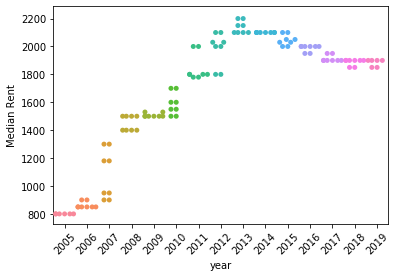

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='year', y='median_rent', data=df_kallang_3rm)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('Median Rent')

_ = plt.xticks(rotation=45)
# Show the plot
plt.show()

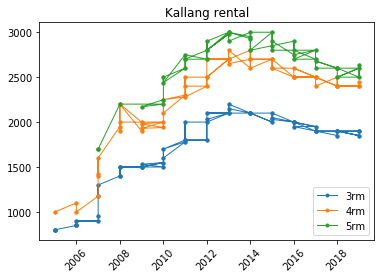

In [108]:
plt.plot('year', 'median_rent', data=df_kallang_3rm, marker='.', linewidth=1, label='3rm')
plt.plot('year', 'median_rent', data=df_kallang_4rm, marker='.', linewidth=1, label='4rm')
plt.plot('year', 'median_rent', data=df_kallang_5rm, marker='.', linewidth=1, label='5rm')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.title('Kallang rental')
plt.show()

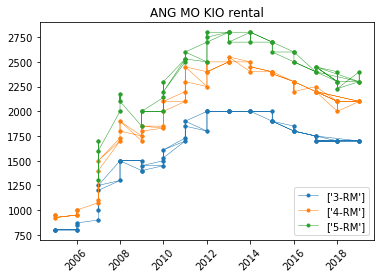

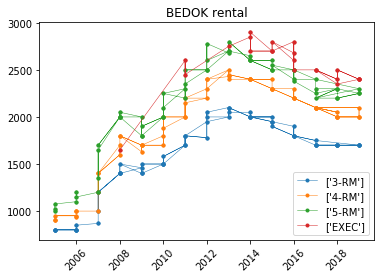

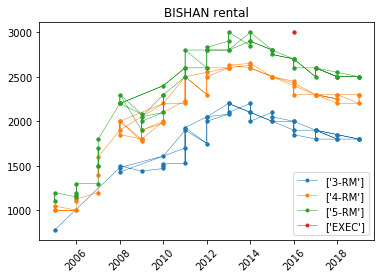

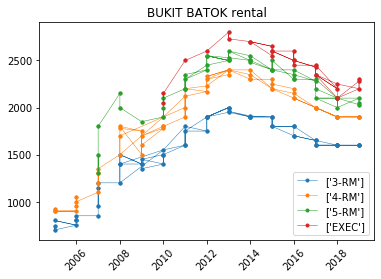

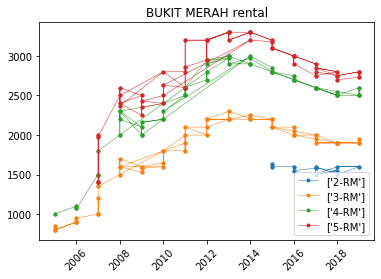

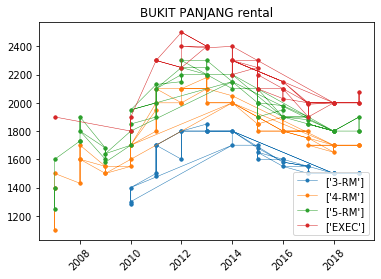

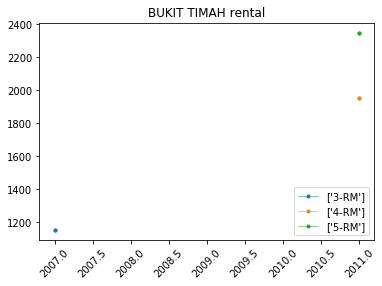

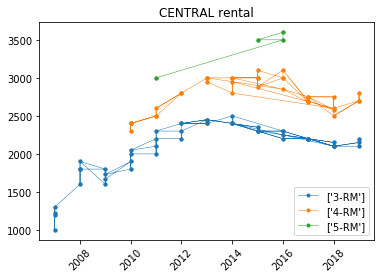

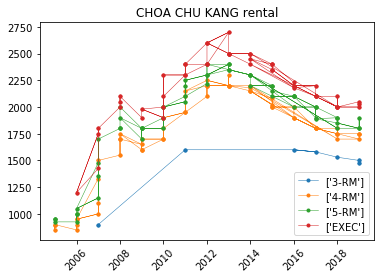

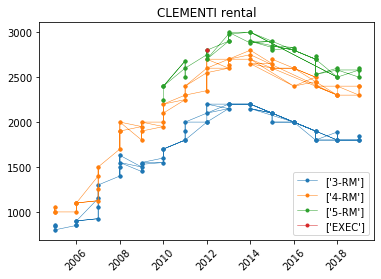

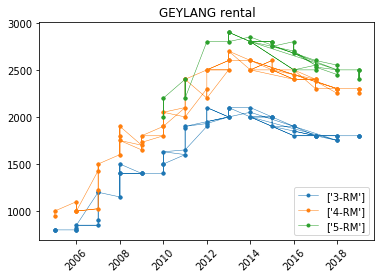

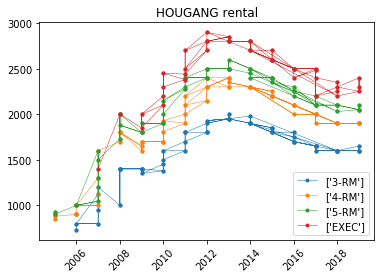

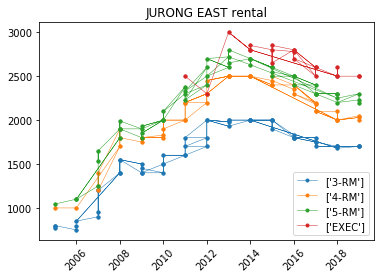

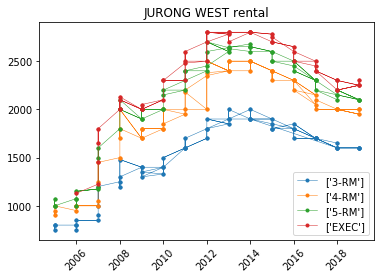

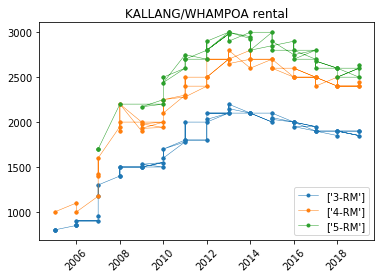

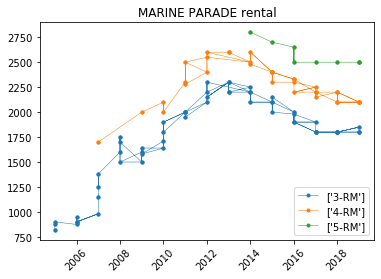

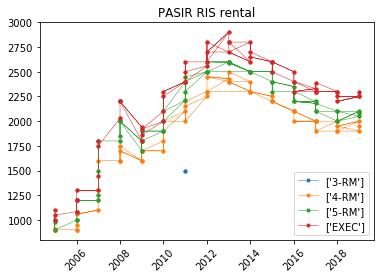

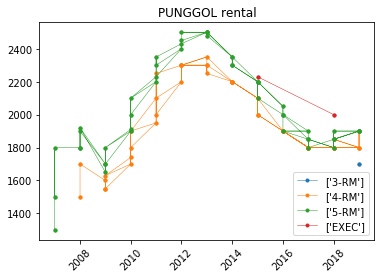

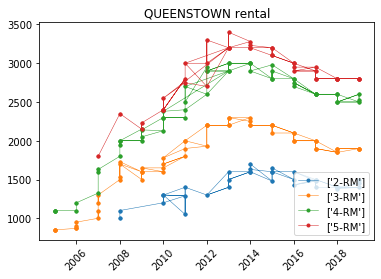

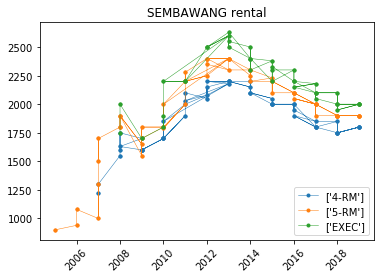

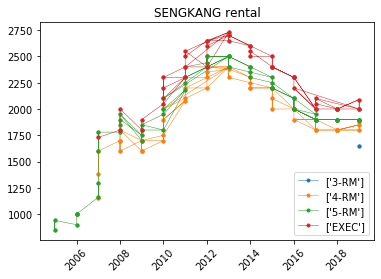

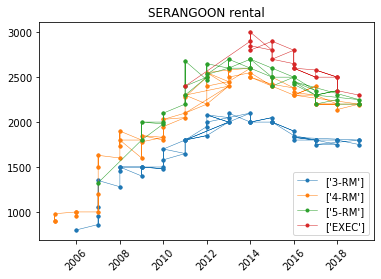

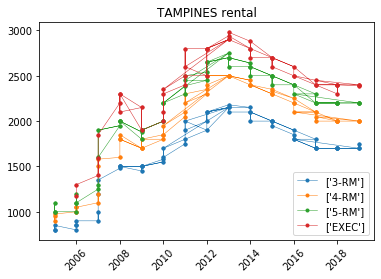

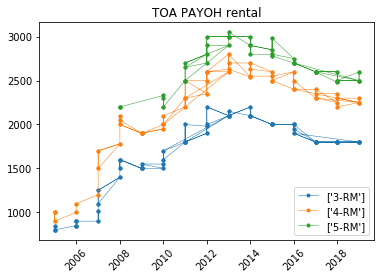

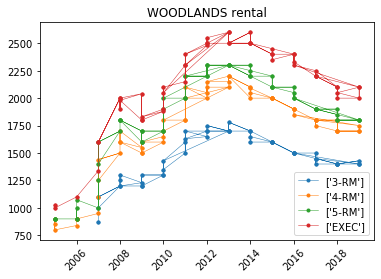

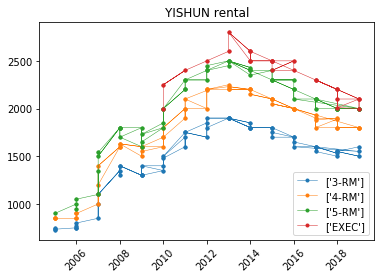

In [109]:
for town in list_town:
    df_ = df[df.town==town[0]]
    list_type = df_[df_.town==town[0]].flat_type.groupby(df_.flat_type).unique()
    for flattype in list_type:
        df_rms = df_[df_.flat_type==flattype[0]]
        plt.plot('year', 'median_rent', data=df_rms, marker='.',  linewidth=0.5, label=flattype)
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.title(f'{town[0]} rental')
    plt.show()    

### Comments
From the above plots from HDB rental by town in Singapore, we could see clearly the positive correlation between centralization and the rental resiliance. Prime locations (in other words: central locations) suffer much less at economic down-turn while outskirt towns see sharp drop at the same period, although those places might enjoy quick rental increase at good times. 

Therefore, a defensive strategy would be purchasing flats in popular areas in city centers. 